# 

In [1]:
import pandas as pd
#from pmdarima.arima import auto_arima
import prophet
#85 percent train 15 percent test

Importing plotly failed. Interactive plots will not work.


In [2]:
prophet.Prophet()

In [2]:
df = pd.read_csv('variable_selected_county_dataset.csv', index_col=0)

In [3]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tools.sm_exceptions import ValueWarning
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller

data = pd.read_csv('variable_selected_county_dataset.csv').iloc[:, 1:]


def difference(df):
    df['incremental_cases'] = df['incremental_cases'].diff().fillna(df['incremental_cases'])
    return df


chicago = data[data['entity'] == 'New York-Nassau'].loc[:, ['date', 'incremental_cases']]
chicago['incremental_cases'] = chicago['incremental_cases'].astype('int')
chicago['date'] = pd.to_datetime(chicago['date'], format="%Y-%m-%d")

# use 85%-15% for train-test split
train = chicago.iloc[:230, :]
test = chicago.iloc[230:, :]

def stationary_test(series):
    result = adfuller(series)
    return (result[0], result[1])

# NYC data is stationary without any differencing
stationary_test(train.incremental_cases)

(-3.56310214760178, 0.00650690429463449)

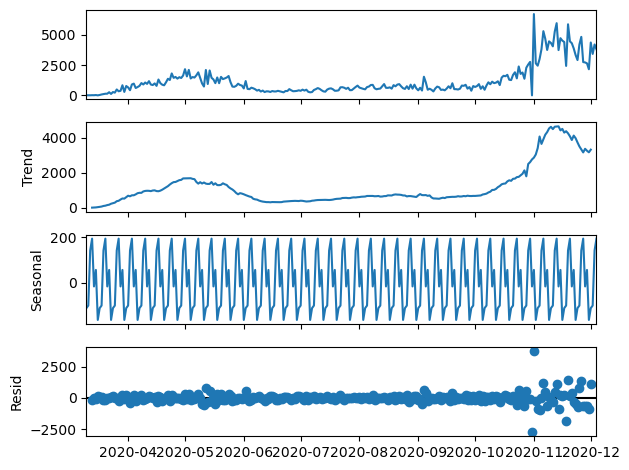

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

analysis = chicago.set_index('date').copy()


decompose_result_mult = seasonal_decompose(analysis)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [24]:
for x in decompose_result_mult.seasonal:
    print(x)

-36.423795976427556
16.61633814265394
12.724446250762039
20.365677707782975
23.508534850640114
-1.5102621418410929
-35.280938833570424
-36.423795976427556
16.61633814265394
12.724446250762039
20.365677707782975
23.508534850640114
-1.5102621418410929
-35.280938833570424
-36.423795976427556
16.61633814265394
12.724446250762039
20.365677707782975
23.508534850640114
-1.5102621418410929
-35.280938833570424
-36.423795976427556
16.61633814265394
12.724446250762039
20.365677707782975
23.508534850640114
-1.5102621418410929
-35.280938833570424
-36.423795976427556
16.61633814265394
12.724446250762039
20.365677707782975
23.508534850640114
-1.5102621418410929
-35.280938833570424
-36.423795976427556
16.61633814265394
12.724446250762039
20.365677707782975
23.508534850640114
-1.5102621418410929
-35.280938833570424
-36.423795976427556
16.61633814265394
12.724446250762039
20.365677707782975
23.508534850640114
-1.5102621418410929
-35.280938833570424
-36.423795976427556
16.61633814265394
12.72444625076203

In [4]:
arimaModel = chicago[['date', 'incremental_cases']]
arimaModel.rename(columns={"date": "ds", "incremental_cases": "y"}, inplace=True)
train = arimaModel.head(int(0.85*len(arimaModel))+1)
test = arimaModel.tail(int(0.15*len(arimaModel)))

In [17]:
train

,ds,y
1620,2020-03-10,2
1621,2020-03-11,9
1622,2020-03-12,13
1623,2020-03-13,10
1624,2020-03-14,28
...,...,...
1845,2020-10-21,133
1846,2020-10-22,77
1847,2020-10-23,101
1848,2020-10-24,161


11:02:52 - cmdstanpy - INFO - Chain [1] start processing
11:02:52 - cmdstanpy - INFO - Chain [1] done processing


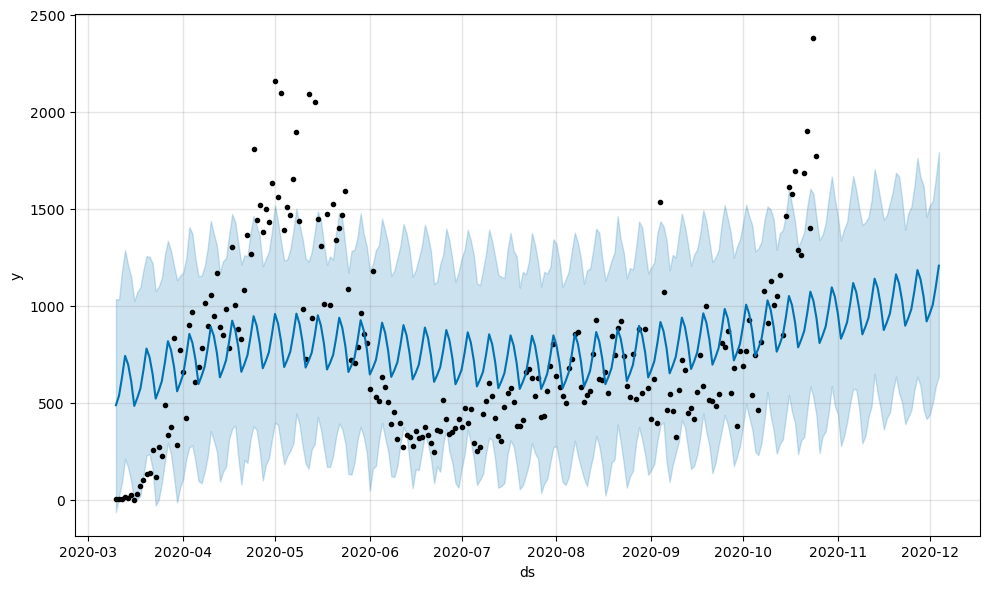

In [9]:
baseModel = prophet.Prophet().fit(train)
future = baseModel.make_future_dataframe(periods=40)
forecast = baseModel.predict(future)
baseModel.plot(forecast);

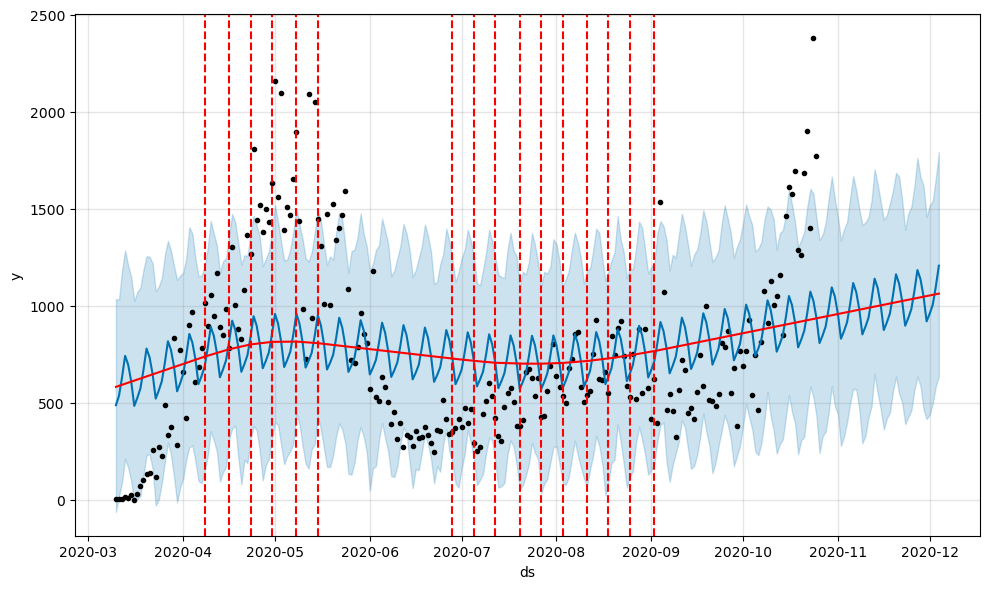

In [10]:
from prophet.plot import add_changepoints_to_plot

# Change points to plot
fig = baseModel.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), baseModel, forecast)

In [6]:
import statsmodels.api as sm

In [5]:
COVID = pd.DataFrame({
    'holiday': 'COVID',
    'ds': pd.to_datetime(['2020-03-15']),
    'lower_window': -15,
    'upper_window': 15,
})

# Super Bowl time window
superbowl = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime(['2020-02-02']),
    'lower_window': -7,
    'upper_window': 1,
})

# Combine all events
events = pd.concat((COVID, superbowl))

In [6]:
dfToUse = df[df['entity'] == 'New York-Nassau']
dfToUse.rename(columns={"date": "ds", "incremental_cases": "y"}, inplace=True)
foo = dfToUse.copy().drop(labels=['ds','entity','y','cases'],axis=1)
non_floats = []
for col in foo:
    if foo[col].dtypes == "float64":
        non_floats.append(col)
foo.drop(labels=non_floats,axis=1,inplace=True)
    
dummyDF = pd.get_dummies(dfToUse, columns=foo.columns.tolist())



In [7]:
toDrop = dummyDF.columns[dummyDF.nunique() == 1].tolist()
#toDrop.pop()
#dfToUse.drop(labels=toDrop, axis=1, inplace=True)
dummyDF.drop(labels=toDrop, axis=1, inplace=True)

In [66]:
dummyDF.ds

193     2020-03-10
205     2020-03-11
217     2020-03-12
229     2020-03-13
241     2020-03-14
           ...    
3373    2020-11-30
3385    2020-12-01
3397    2020-12-02
3409    2020-12-03
3421    2020-12-04
Name: ds, Length: 270, dtype: object

In [8]:
dummyDF.drop(labels=['average_grade_performance'], axis=1, inplace=True)
train = dummyDF[dummyDF['ds'] < '2020-10-26'].sort_values(by=['ds']).reset_index().drop(labels=['index'],axis=1)
test = dummyDF[dummyDF['ds'] >= '2020-10-26']

In [71]:
train

,ds,cases,mean_temp,min_temp,max_temp,dewpoint,sea_level_pressure,station_pressure,visibility,wind_speed,...,dewpoint_3d_avg,y,stay_at_home_announced_no,stay_at_home_announced_yes,stay_at_home_effective_no,stay_at_home_effective_yes,"station_name_CHICAGO MIDWAY AIRPORT, IL US",precip_flag_A,precip_flag_G,precip_flag_I
0,2020-03-10,17,43.9,36.0,55.0,39.2,1020.7,995.7,8.2,10.4,...,36.366667,6.0,True,False,True,False,True,False,True,False
1,2020-03-11,22,38.5,34.0,44.1,31.0,1019.6,996.3,7.9,5.0,...,34.966667,5.0,True,False,True,False,True,False,True,False
2,2020-03-12,27,44.6,36.0,55.9,34.7,1010.8,988.0,8.0,7.5,...,30.866667,5.0,True,False,True,False,True,False,True,False
3,2020-03-13,40,43.4,34.0,55.0,26.9,1018.1,994.4,9.6,14.8,...,27.733333,13.0,True,False,True,False,True,False,True,False
4,2020-03-14,51,38.7,33.1,45.0,21.6,1032.0,8.5,9.5,9.5,...,24.600000,11.0,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2020-10-21,168139,50.8,46.0,57.9,43.4,1020.7,997.0,7.7,7.5,...,44.433333,1682.0,False,True,False,True,True,False,True,False
226,2020-10-22,170039,57.5,48.0,79.0,51.9,1016.5,995.6,5.6,9.3,...,49.566667,1900.0,False,True,False,True,True,False,True,False
227,2020-10-23,171437,60.5,44.6,73.9,53.4,1012.2,990.6,8.7,11.8,...,45.066667,1398.0,False,True,False,True,True,False,True,False
228,2020-10-24,173817,41.5,35.1,46.9,29.9,1025.0,1.7,10.0,9.0,...,38.633333,2380.0,False,True,False,True,True,False,True,False


In [72]:
train

,ds,cases,mean_temp,min_temp,max_temp,dewpoint,sea_level_pressure,station_pressure,visibility,wind_speed,...,dewpoint_3d_avg,y,stay_at_home_announced_no,stay_at_home_announced_yes,stay_at_home_effective_no,stay_at_home_effective_yes,"station_name_CHICAGO MIDWAY AIRPORT, IL US",precip_flag_A,precip_flag_G,precip_flag_I
0,2020-03-10,17,43.9,36.0,55.0,39.2,1020.7,995.7,8.2,10.4,...,36.366667,6.0,True,False,True,False,True,False,True,False
1,2020-03-11,22,38.5,34.0,44.1,31.0,1019.6,996.3,7.9,5.0,...,34.966667,5.0,True,False,True,False,True,False,True,False
2,2020-03-12,27,44.6,36.0,55.9,34.7,1010.8,988.0,8.0,7.5,...,30.866667,5.0,True,False,True,False,True,False,True,False
3,2020-03-13,40,43.4,34.0,55.0,26.9,1018.1,994.4,9.6,14.8,...,27.733333,13.0,True,False,True,False,True,False,True,False
4,2020-03-14,51,38.7,33.1,45.0,21.6,1032.0,8.5,9.5,9.5,...,24.600000,11.0,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2020-10-21,168139,50.8,46.0,57.9,43.4,1020.7,997.0,7.7,7.5,...,44.433333,1682.0,False,True,False,True,True,False,True,False
226,2020-10-22,170039,57.5,48.0,79.0,51.9,1016.5,995.6,5.6,9.3,...,49.566667,1900.0,False,True,False,True,True,False,True,False
227,2020-10-23,171437,60.5,44.6,73.9,53.4,1012.2,990.6,8.7,11.8,...,45.066667,1398.0,False,True,False,True,True,False,True,False
228,2020-10-24,173817,41.5,35.1,46.9,29.9,1025.0,1.7,10.0,9.0,...,38.633333,2380.0,False,True,False,True,True,False,True,False


In [9]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

#train.reset_index(inplace=True)

n_splits = 3

tscv = TimeSeriesSplit(n_splits=n_splits)

changepoint_prior_scale = [0.001, 0.01, 0.1, 0.5]
seasonality_prior_scale =  [0.01, 0.1, 1.0, 10.0]
holidays_prior_scale = [0.01, 0.1, 1.0, 10.0]
seasonality_mode = ['additive', 'multiplicative']

best_score, best_cfg = float("inf"), None


    
for h in holidays_prior_scale:
    for c in changepoint_prior_scale:
        for s in seasonality_prior_scale:
            for m in seasonality_mode:
                avg = 0
                for train_index, val_index in tscv.split(train):
                    train_data, val_data = train.loc[train_index, :], train.loc[val_index, :]
                    val_data.fillna(0, inplace=True)
                    train_data.fillna(0, inplace=True)
                    model=prophet.Prophet(holidays=events, holidays_prior_scale=h, changepoint_prior_scale=c, seasonality_prior_scale=s,
                                         seasonality_mode = m,yearly_seasonality=True, weekly_seasonality=True)
                    for ii in train_data.columns:
                        if ii == 'index':
                            continue
                        if ii == 'ds':
                            continue
                        if ii == 'cases':
                            continue
                        if ii == 'y':
                            continue
                        model.add_regressor(ii)
                    model.add_country_holidays(country_name='US')
                    model.fit(train_data)
                    #future = model.make_future_dataframe(periods=val_data.shape[0])
                    #future = future[future['ds'] > train_data.ds.iloc[-1]]
                    forecast = model.predict(val_data)
                    mse = mean_squared_error(val_data.y, forecast.yhat)
                    avg += mse
                if avg < best_score:
                    best_score, best_cfg = avg, (h,c,s,m)

print(f'Best ARIMA parameters: {best_cfg} with MSE: {best_score}')

22:46:16 - cmdstanpy - INFO - Chain [1] start processing
22:46:18 - cmdstanpy - INFO - Chain [1] done processing
22:46:19 - cmdstanpy - INFO - Chain [1] start processing
22:46:19 - cmdstanpy - INFO - Chain [1] done processing
22:46:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:46:19 - cmdstanpy - INFO - Chain [1] start processing
22:46:23 - cmdstanpy - INFO - Chain [1] done processing
22:46:23 - cmdstanpy - INFO - Chain [1] start processing
22:46:24 - cmdstanpy - INFO - Chain [1] done processing
22:46:24 - cmdstanpy - INFO - Chain [1] start processing
22:46:25 - cmdstanpy - INFO - Chain [1] done processing
22:46:25 - cmdstanpy - INFO - Chain [1] start processing
22:46:25 - cmdstanpy - INFO - Chain [1] done processing
22:46:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:46:26 -

Best ARIMA parameters: (0.01, 0.1, 0.1, 'additive') with MSE: 155306.74507538122


23:32:37 - cmdstanpy - INFO - Chain [1] start processing
23:32:37 - cmdstanpy - INFO - Chain [1] done processing


<Axes: title={'center': 'Multivariate Prophet Predictions for New York'}, xlabel='date'>

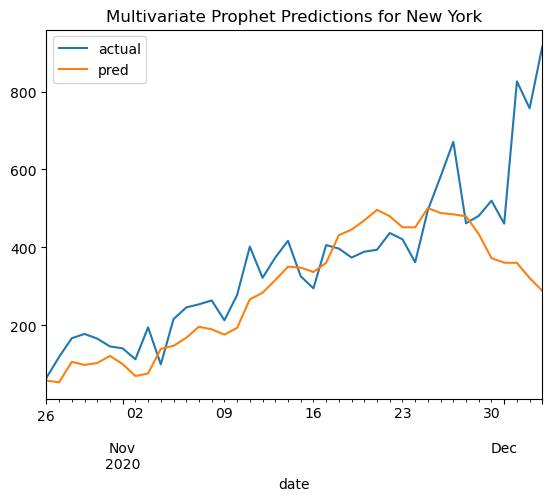

In [10]:


model=prophet.Prophet(holidays=events, holidays_prior_scale=0.001, changepoint_prior_scale=0.1, seasonality_prior_scale=0.1,
                                         seasonality_mode = 'additive',yearly_seasonality=True, weekly_seasonality=True)
model.add_country_holidays(country_name='US')
test.fillna(0, inplace=True)
train.fillna(0, inplace=True)
for ii in train.columns:
    if ii == 'index':
        continue
    if ii == 'ds':
        continue
    if ii == 'cases':
        continue
    if ii == 'y':
        continue
    model.add_regressor(ii)
model.fit(train)
pred = model.predict(test)


prediction = pd.DataFrame({'actual':test.y.reset_index(drop = True), 
              'pred':pred.yhat.reset_index(drop = True)})
prediction['date'] = pd.to_datetime(test['ds'].reset_index(drop = True))
prediction.plot(x = 'date', y = ['actual', 'pred'], title='Multivariate Prophet Predictions for New York')

In [11]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(prediction[prediction['actual'] != 0].actual, prediction[prediction['actual'] != 0].pred)

0.2614675456265398

23:32:47 - cmdstanpy - INFO - Chain [1] start processing
23:32:47 - cmdstanpy - INFO - Chain [1] done processing


<Axes: title={'center': 'Multivariate Prophet Predictions for Chicago'}, xlabel='date'>

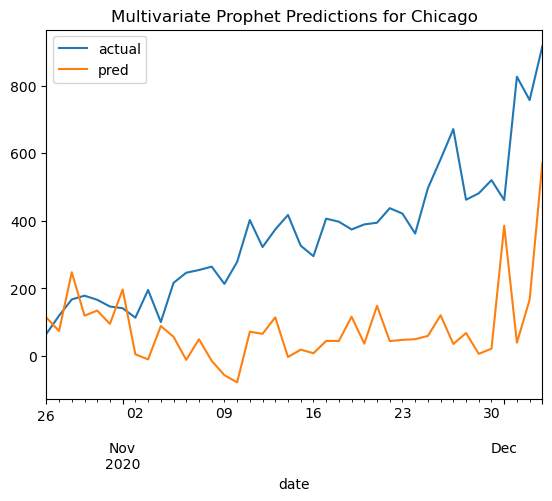

In [12]:


model=prophet.Prophet()
model.add_country_holidays(country_name='US')
test.fillna(0, inplace=True)
train.fillna(0, inplace=True)
for ii in train.columns:
    if ii == 'index':
        continue
    if ii == 'ds':
        continue
    if ii == 'cases':
        continue
    if ii == 'y':
        continue
    model.add_regressor(ii)
model.fit(train)
pred = model.predict(test)


prediction = pd.DataFrame({'actual':test.y.reset_index(drop = True), 
              'pred':pred.yhat.reset_index(drop = True)})
prediction['date'] = pd.to_datetime(test['ds'].reset_index(drop = True))
prediction.plot(x = 'date', y = ['actual', 'pred'], title='Multivariate Prophet Predictions for Chicago')

In [13]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(prediction[prediction['actual'] != 0].actual, prediction[prediction['actual'] != 0].pred)

0.7699585592182332

In [24]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

train.reset_index(inplace=True)

n_splits = 3

tscv = TimeSeriesSplit(n_splits=n_splits)

changepoint_prior_scale = [0.001, 0.01, 0.1, 0.5]
seasonality_prior_scale =  [0.01, 0.1, 1.0, 10.0]
holidays_prior_scale = [0.01, 0.1, 1.0, 10.0]
seasonality_mode = ['additive', 'multiplicative']

best_score, best_cfg = float("inf"), None


    
for h in holidays_prior_scale:
    for c in changepoint_prior_scale:
        for s in seasonality_prior_scale:
            for m in seasonality_mode:
                avg = 0
                for train_index, val_index in tscv.split(train):
                    train_data, val_data = train.loc[train_index, :], train.loc[val_index, :]
                    model=prophet.Prophet(holidays=events, holidays_prior_scale=h, changepoint_prior_scale=c, seasonality_prior_scale=s,
                                         seasonality_mode = m)
                    model.add_country_holidays(country_name='US')
                    model.fit(train_data)
                    future = model.make_future_dataframe(periods=val_data.shape[0])
                    future = future[future['ds'] > train_data.ds.iloc[-1]]
                    forecast = model.predict(future)
                    mse = mean_squared_error(val_data.y, forecast.yhat)
                    avg += mse
                if avg < best_score:
                    best_score, best_cfg = avg, (h,c,s,m)

print(f'Best ARIMA parameters: {best_cfg} with MSE: {best_score}')

14:25:44 - cmdstanpy - INFO - Chain [1] start processing
14:25:49 - cmdstanpy - INFO - Chain [1] done processing
14:25:50 - cmdstanpy - INFO - Chain [1] start processing
14:25:50 - cmdstanpy - INFO - Chain [1] done processing
14:25:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:25:50 - cmdstanpy - INFO - Chain [1] start processing
14:25:50 - cmdstanpy - INFO - Chain [1] done processing
14:25:51 - cmdstanpy - INFO - Chain [1] start processing
14:25:51 - cmdstanpy - INFO - Chain [1] done processing
14:25:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:25:51 - cmdstanpy - INFO - Chain [1] start processing
14:25:55 - cmdstanpy - INFO - Chain [1] done processing
14:25:55 - cmdstanpy - INFO - Chain [1] start processing
14:26:01 - cmdstanpy - INFO - Chain [1] done processing
14:26:01 -

Best ARIMA parameters: (0.1, 0.5, 10.0, 'additive') with MSE: 3941213.8781684698


15:02:29 - cmdstanpy - INFO - Chain [1] start processing
15:02:29 - cmdstanpy - INFO - Chain [1] done processing


-1.7588584595700625


<Axes: xlabel='date'>

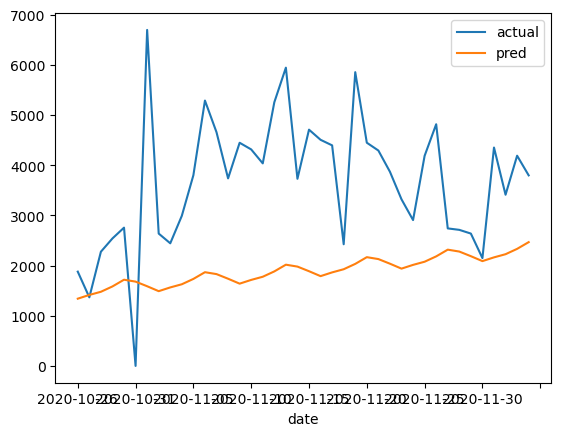

In [25]:


model=prophet.Prophet(holidays=events, holidays_prior_scale=0.1, changepoint_prior_scale=0.5, seasonality_prior_scale=10,
                                         seasonality_mode = 'additive')
model.add_country_holidays(country_name='US')
model.fit(train)
future = model.make_future_dataframe(periods=40)
future = future[future['ds'] > train.ds.iloc[-1]]
pred = model.predict(future)


r2 = r2_score(test.y, pred.yhat)
print(r2)

prediction = pd.DataFrame({'actual':test.y.reset_index(drop = True), 
              'pred':pred.yhat.reset_index(drop = True)})
prediction['date'] = test['ds'].reset_index(drop = True)
prediction.plot(x = 'date', y = ['actual', 'pred'])